In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
train=pd.read_csv("input/train_diam.csv")
test=pd.read_csv("input/test_diam.csv")

In [3]:
X=train.drop(columns=["price"])
y=train["price"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [130]:
regr=RandomForestRegressor(n_estimators=1000,max_depth=6)
regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, n_estimators=1000)

In [131]:
y_pred=regr.predict(X_test)

In [132]:
np.sqrt(mse(y_test,y_pred))

1025.882121094937

In [103]:
parameters={
    "n_estimators":[100,200,400],     
}

In [104]:
rfc=RandomForestRegressor()

In [105]:
grid=GridSearchCV(rfc,parameters)

In [115]:
regr=RandomForestRegressor(n_estimators=1000,max_depth=4)
regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=1000)

In [116]:
y_pred=regr.predict(X_test)
np.sqrt(mse(y_test,y_pred))

1264.6459330016357

In [6]:
regr=RandomForestRegressor(n_estimators=1000,max_depth=4)
regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=1000)

In [7]:
y_pred=regr.predict(X_test)
np.sqrt(mse(y_test,y_pred))

1269.4804002812461

In [113]:
y_pred=regr.predict(test)

In [8]:
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

In [9]:
b,m=polyfit(y_test,y_pred,1)

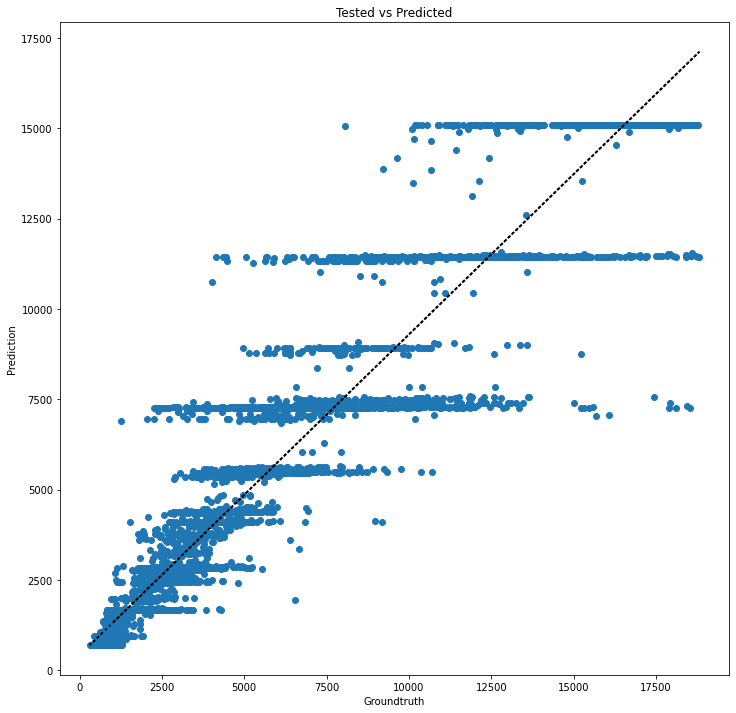

In [13]:
plt.figure(figsize=(12,12))
plt.scatter(x=y_test,y=y_pred)
plt.plot(y_test,b+m*(y_test),':', c="black", linewidth=2)
plt.title("Tested vs Predicted")
plt.xlabel("Groundtruth")
plt.ylabel("Prediction")
plt.savefig("output/RandomForest.jpg")